<a href="https://colab.research.google.com/github/bidlopov/ML_Wikipedia_Clustering/blob/main/LR_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wikipedia

import wikipedia
articles=['Ancient Egypt', 'World War I', 'Roman Empire', 'Ancient Greece', 'Middle Ages', 'French Revolution', 'History of China', 'Ancient Rome', 'History of Great Britain', 'History of the United States', 'History of Russia', 'History of Japan', 'Renaissance', 'Industrial Revolution', 'History of science',
          'Artificial intelligence', 'Quantum computing', 'Internet of things', 'Robotics', 'Biotechnology', 'Space technology', 'Nanotechnology', 'Blockchain technology', 'Electric vehicles', 'Robots', '3D printing', 'Renewable energy', 'Information security', 'Big Data', 'Virtual reality',
          'Football', 'Basketball', 'Tennis', 'Swimming', 'Water polo', 'Cricket', 'Golf', 'Racing', 'Boxing', 'Volleyball', 'Ice Hockey', 'Gymnastics', 'Cycling', 'Martial Arts', 'Figure Skating']
wiki_list=[]
title=[]
for article in articles:
    print("loading content: ", article)
    wiki_list.append(wikipedia.page(article, auto_suggest=False, redirect=True, preload=False).content)
    title.append(article)

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=f80e14682204ac19844e3c30b73436a0c65b3711d6aaa59f7d26bb529aa533b9
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia
loading content:  Ancient Egypt
loading content:  World War I
loading content:  Roman Empire
loading content:  Ancient Greece
loading content:  Middle Ages
loading content:  French Revolution
loading content:  History of China
loading content:  Ancient Rome
loading content:  History of Great Britain
loading content:  History of the United States
loading content:  History of Russia
loading content:  History of Japan
loading content:  Renaissance
loading content:  Industrial Revolution
loading content:  History of science
loading content:  Artificial intelligence
loading content:  Quantum computing
loading content:  Internet of things
loading content:  Robotics

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import spacy
from nltk.stem.snowball import SnowballStemmer

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
nlp = spacy.load("en_core_web_sm")
stemmer = SnowballStemmer("english")

def preprocess(text):
    doc = nlp(text.lower())
    lemmatized_words = [token.lemma_ for token in doc if token.text not in punctuation and token.text not in stop_words]
    stemmed_words = [stemmer.stem(word) for word in lemmatized_words]
    return " ".join(stemmed_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(preprocessor = preprocess)
X = vectorizer.fit_transform(wiki_list)

print(vectorizer.get_feature_names_out())
print(X.shape)

['00' '000' '00046' ... '秦朝' '蓝田人' '蹴鞠']
(45, 23649)


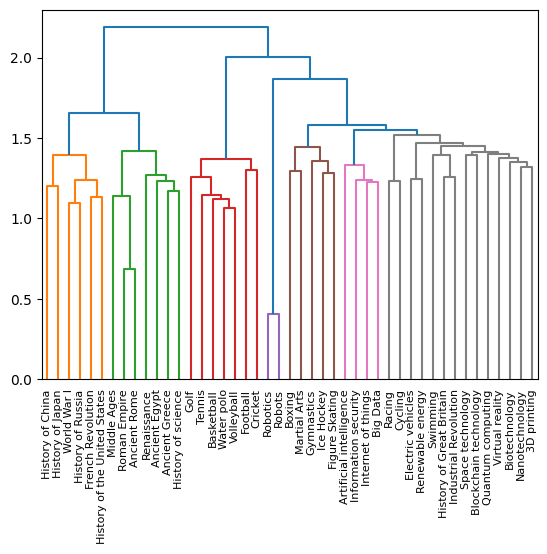

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

mergings = linkage(X.toarray(), method='ward')
dendrogram(mergings,
           labels=title,
           leaf_rotation=90,
           leaf_font_size=8,
           )

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


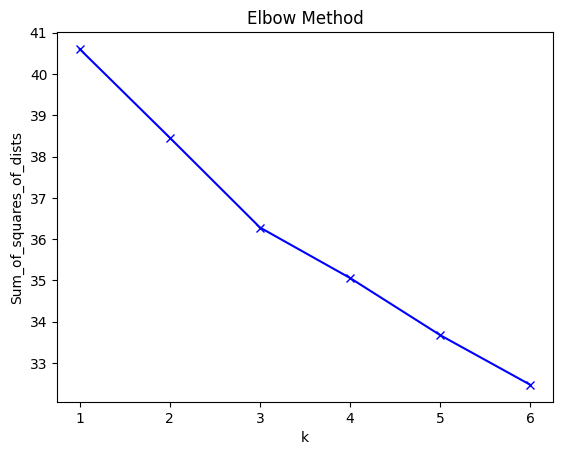

In [ ]:
#import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,7)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squares_of_dists')
plt.title('Elbow Method')
plt.show()

In [ ]:
import pandas as pd
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl)

                           title  cluster
0                  Ancient Egypt        1
1                    World War I        1
2                   Roman Empire        1
3                 Ancient Greece        1
4                    Middle Ages        1
5              French Revolution        1
6               History of China        1
7                   Ancient Rome        1
8       History of Great Britain        1
9   History of the United States        1
10             History of Russia        1
11              History of Japan        1
12                   Renaissance        1
13         Industrial Revolution        1
14            History of science        1
15       Artificial intelligence        0
16             Quantum computing        0
17            Internet of things        0
18                      Robotics        0
19                 Biotechnology        0
20              Space technology        0
21                Nanotechnology        0
22         Blockchain technology  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import seaborn as sns

db = DBSCAN(eps=1.335, min_samples=6).fit(X)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('clusters:', n_clusters_)
print('noise:', n_noise_)

clusters = pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(clusters)

clusters: 2
noise: 6
                           title  cluster
0                  Ancient Egypt        0
1                    World War I        0
2                   Roman Empire        0
3                 Ancient Greece        0
4                    Middle Ages        0
5              French Revolution        0
6               History of China        0
7                   Ancient Rome        0
8       History of Great Britain        0
9   History of the United States        0
10             History of Russia        0
11              History of Japan        0
12                   Renaissance        0
13         Industrial Revolution        0
14            History of science        0
15       Artificial intelligence        0
16             Quantum computing        0
17            Internet of things        0
18                      Robotics        0
19                 Biotechnology        0
20              Space technology        0
21                Nanotechnology        0
22         Bl